## Quesiton 1 - Importing libraries and data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing data
path = r'C:\Users\javir\Downloads\Javis Data Analytics stuff\Achievement 4\Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_combined.pkl'))

## Question 2 - Create a bar chart, histogram, scatterplot, and a line chart (use sample subet)

#### - Bar chart

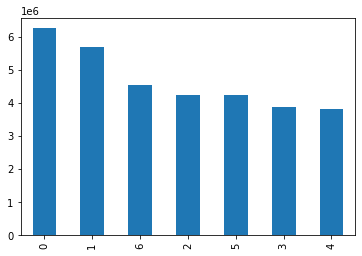

In [3]:
bar = df['orders_day_of_week'].value_counts().plot.bar()

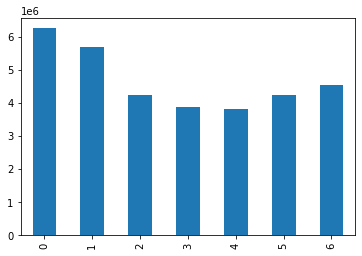

In [4]:
bar_sort = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

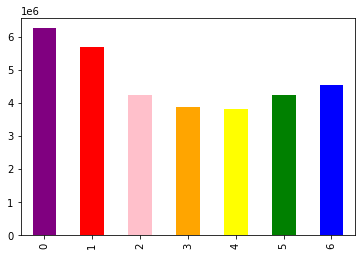

In [5]:
bar_color_sort = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

#### - Histogram

<AxesSubplot:ylabel='Frequency'>

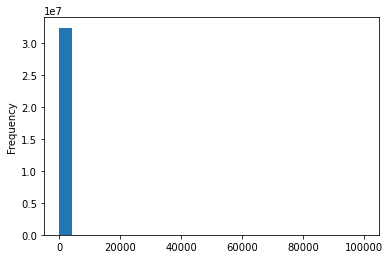

In [6]:
df['prices'].plot.hist(bins = 25)

In [7]:
# Checking our values are our histogram us bi-functioning
df['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [8]:
# We have outliers in our data set that will break our histogram
df['prices'].max()
# Products most likely are not within the 99,999 dollar price range

99999.0

In [9]:
# Looking for rows that have products above 100 dollar price range
df.loc[df['prices'] > 100]

,order_id,user_id,evaluation_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,ordered_today,product_id,add_to_cart_order,...,first_name,last_name,gender,state,age,date_joined,num_of_dependants,family_status,income,_merge
1592,912404,17,prior,12,2,14,5.0,False,21553.0,5.0,...,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659,both
1654,603376,17,prior,22,6,16,4.0,False,21553.0,3.0,...,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659,both
16668,3264360,135,prior,2,2,21,13.0,False,21553.0,6.0,...,nan,Chen,Female,Maryland,30,3/19/2017,3,married,120635,both
16674,892534,135,prior,3,0,8,12.0,False,21553.0,3.0,...,nan,Chen,Female,Maryland,30,3/19/2017,3,married,120635,both
54053,229704,342,prior,8,1,19,30.0,False,21553.0,9.0,...,Ruby,Bates,Female,Minnesota,56,8/23/2018,2,married,187328,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556283,3172853,205650,prior,18,1,9,7.0,False,21553.0,17.0,...,Jeremy,Vang,Male,Kentucky,62,10/2/2017,0,divorced/widowed,302526,both
32583684,2504315,205818,prior,3,5,15,3.0,False,21553.0,13.0,...,James,Hunter,Male,Maryland,60,7/12/2019,1,married,172539,both
32583694,1108388,205818,prior,5,4,5,1.0,False,21553.0,5.0,...,James,Hunter,Male,Maryland,60,7/12/2019,1,married,172539,both
32616755,1916142,206049,prior,1,2,17,NaN,True,21553.0,2.0,...,Louise,Leal,Female,District of Columbia,23,4/26/2019,1,married,169022,both


In [10]:
# Replacing values taht are over 100 dollar price range, with NAN so they do not disrupt our charts
df.loc[df['prices'] >100, 'prices'] = np.nan

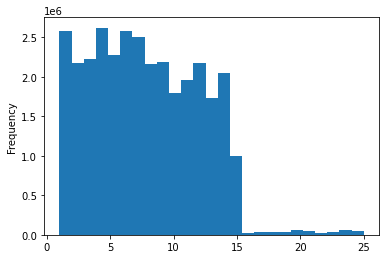

In [11]:
# Retrying histogram and defining it as an object
hist = df['prices'].plot.hist(bins = 25)

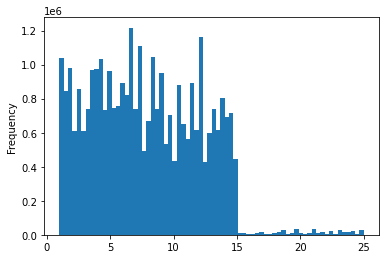

In [12]:
# Creating 2nd historgram with larger bin
hist_2 = df['prices'].plot.hist(bins = 70)

#### - Scatterplot

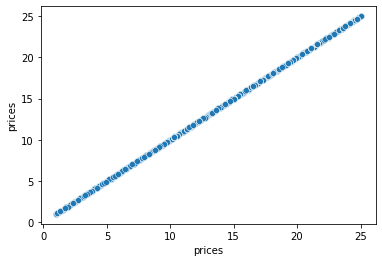

In [13]:
# Checking to see if we still hold outliers in our data frame
scat = sns.scatterplot(x = 'prices', y = 'prices', data = df)

#### - Line chart

In [14]:
# We are going to create a sample subset that selects rows by random generated numbers
np.random.seed(2)
dev = np.random.rand(len(df)) <= 0.7

In [15]:
# Checking our values to ensure they are booleans
dev

array([ True,  True,  True, ...,  True,  True, False])

In [16]:
# Creating two grouped dataframes
big = df[dev]
small = df[~dev]
# Our 'big' data frame should be a representation of 70% while 'small' should be 30%

In [19]:
# Reducing our sample to only the columns we are looking for to save on processing time
df_big = big[['orders_day_of_week','prices']]

In [20]:
# Reducing our sample to only the columns we are looking for to save on processing time
df_small = small[['orders_day_of_week','prices']]

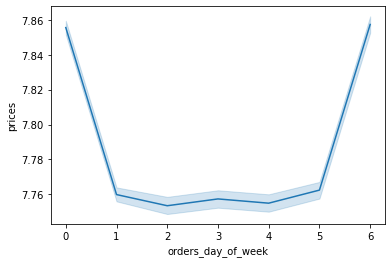

In [21]:
line = sns.lineplot(data = df_big, x = 'orders_day_of_week', y = 'prices')

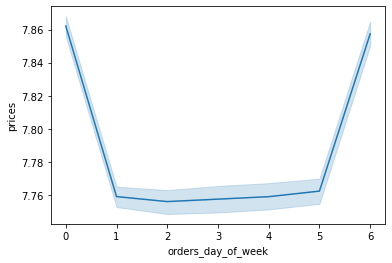

In [22]:
line_2 = sns.lineplot(data = df_small, x = 'orders_day_of_week', y = 'prices')

## Question 3 - Create a histogram of 'order_hour_of_day' column

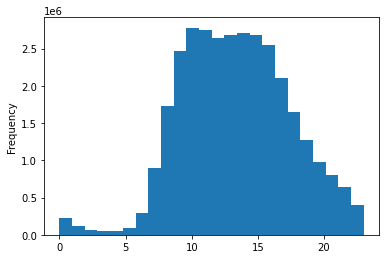

In [23]:
ord_hour_hist = df['order_hour_of_day'].plot.hist(bins = 24)

#### This histogram reprents the hours of the day when orders are made, as we can see from 10-16 are the hours most orders are made, 10am - 4pm

## Question 4 - Create a barchart from 'loyalty_flag' column

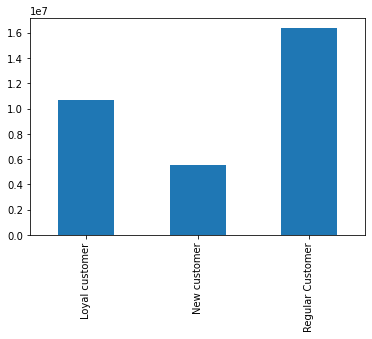

In [24]:
loyalty_bar = df['loyalty_flag'].value_counts().sort_index().plot.bar()

## Question 5 - Check the difference in expenditure depending on hour of day

In [25]:
# Creating a new sample
np.random.seed(3)
dev_2 = np.random.rand(len(df)) <= 0.8

In [26]:
# Creating a dataframe of 80%
big_2 = df[dev_2]

In [27]:
# Reducing our sample to only the columns we are looking for to save on processing time
df_big_2 = big_2[['order_hour_of_day','prices']]

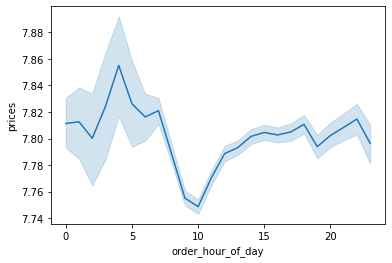

In [28]:
line_hour = sns.lineplot(data = df_big_2, x = 'order_hour_of_day', y = 'prices')

## Question 6 - Line chart showing connection between age and number of dependents

In [29]:
# Creating a dataframe utilizing the sample dev_2 we made that holds the columns we are wishing to use for chart
big_3 = df[dev_2]

In [30]:
# Creatioin of dataframe
df_big_3 = big_3[['age','num_of_dependants']]

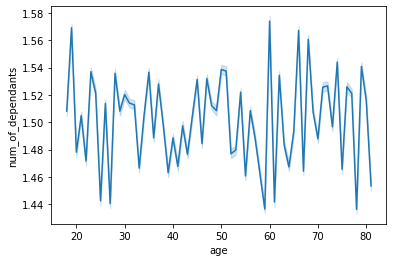

In [32]:
# Creation of line chart
line_age_dep = sns.lineplot(data = df_big_3, x = 'age', y = 'num_of_dependants')

#### This line chart is showing that there is no relationship between age and number of dependants, there is no pattern that we can dictate from this chart.

## Question 7 - Creating a scatterplot to visualize relationship between age and spending power

In [33]:
# Creating a Dataframe that only holds columns 'age' and 'income'
df_scat = df[['age', 'income']]

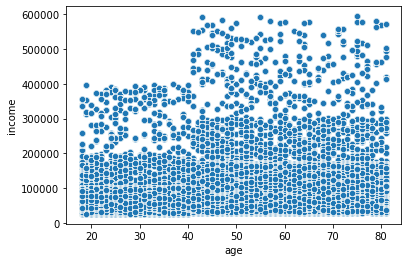

In [34]:
scat_age_spend = sns.scatterplot(data = df_scat, x = 'age', y = 'income')

#### This scatteplot shows that as people age, their income increases as well 

## Question 8 - Exporting charts

In [40]:
# Question 2 Charts
bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','barchart.png'))
bar_sort.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','bar_sortchart.png'))
bar_color_sort.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','bar_color_sortchart.png'))
hist.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','histogram.png'))
hist_2.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','histogram_2.png'))
scat.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','scatterplot.png'))
line.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','linechart.png'))
line_2.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','linechart_2.png'))

In [41]:
# Question 3 Chart
ord_hour_hist.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','order_hour_histogram.png'))

In [43]:
# Question 4 Chart
loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','loyalty_barchart.png'))

In [44]:
# Question 5 Chart
line_hour.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','order_hour_linechart.png'))

In [45]:
# Question 6 Chart
line_age_dep.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','age_dependants_linechart.png'))

In [46]:
# Question 7 Chart
scat_age_spend.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','age_income_scatterplot.png'))